In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df = df.drop(["loan_id"],axis=1)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [14]:
df.isnull().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df[" education"] = le.fit_transform(df[" education"])
df[" self_employed"] = le.fit_transform(df[" self_employed"])
df[" loan_status"] = le.fit_transform(df[" loan_status"])

df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


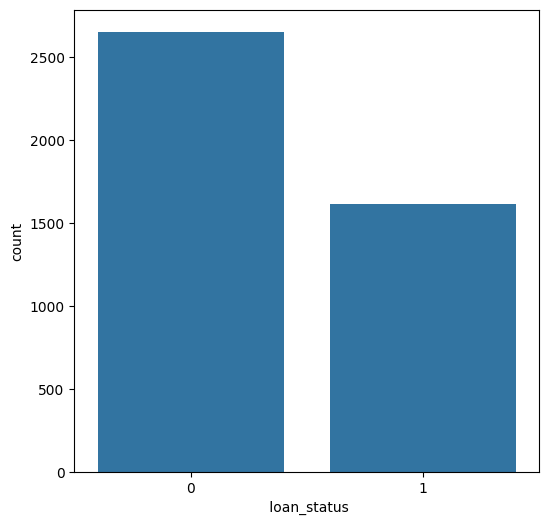

In [6]:
plt.figure(figsize=(6,6))
sns.countplot(df,x=" loan_status")
plt.show()

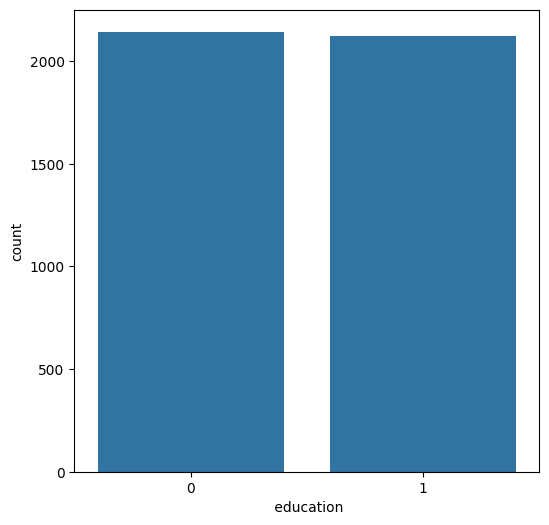

In [7]:
plt.figure(figsize=(6,6))
sns.countplot(df,x=" education")
plt.show()


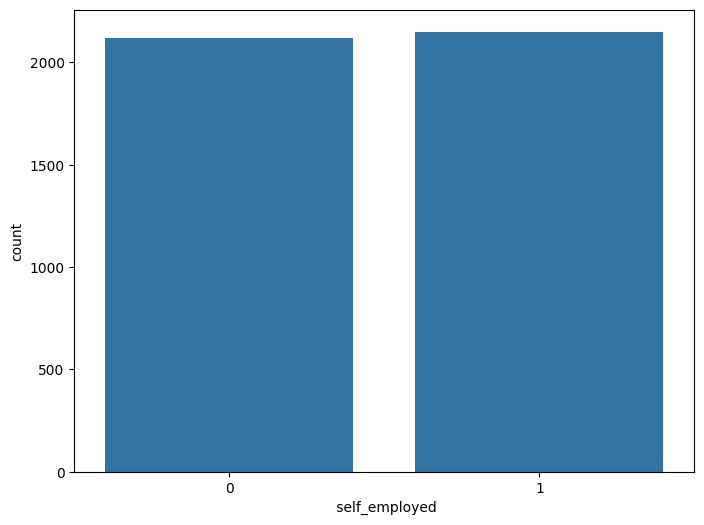

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(df,x=" self_employed")
plt.show()

In [9]:
x = df.drop([" loan_status"],axis=1)
y = df[" loan_status"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

*logistic regression*

In [10]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
regpred = reg.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,regpred))
print("Accuracy of Logistic Regression is : ",accuracy_score(y_test,regpred)*100)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("Mean Absolute Error : ",mean_absolute_error(y_test,regpred))
print("Mean Squared Error : ",mean_squared_error(y_test,regpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,regpred)))
print("R2 Score : ",r2_score(y_test,regpred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       534
           1       1.00      0.00      0.01       320

    accuracy                           0.63       854
   macro avg       0.81      0.50      0.39       854
weighted avg       0.77      0.63      0.48       854

Accuracy of Logistic Regression is :  62.64637002341921
Mean Absolute Error :  0.373536299765808
Mean Squared Error :  0.373536299765808
Root Mean Squared Error :  0.6111761609927272
R2 Score :  -0.594253277153558


*decision tree*

In [11]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtreepred = dtree.predict(x_test)

print(classification_report(y_test,dtreepred))
print("Accuracy of Decision Tree is : ",accuracy_score(y_test,dtreepred)*100)
print("Mean Absolute Error : ",mean_absolute_error(y_test,dtreepred))
print("Mean Squared Error : ",mean_squared_error(y_test,dtreepred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,dtreepred)))
print("R2 Score : ",r2_score(y_test,dtreepred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       534
           1       0.98      0.97      0.97       320

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Accuracy of Decision Tree is :  98.12646370023418
Mean Absolute Error :  0.01873536299765808
Mean Squared Error :  0.01873536299765808
Root Mean Squared Error :  0.13687718216583097
R2 Score :  0.9200374531835206


*random forest*

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rfpred = rf.predict(x_test)

print(classification_report(y_test,rfpred))
print("Accuracy of Random Forest is is : ",accuracy_score(y_test,rfpred)*100)
print("Mean Absolute Error : ",mean_absolute_error(y_test,rfpred))
print("Mean Squared Error : ",mean_squared_error(y_test,rfpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,rfpred)))
print("R2 Score : ",r2_score(y_test,rfpred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       534
           1       0.99      0.97      0.98       320

    accuracy                           0.98       854
   macro avg       0.99      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Accuracy of Random Forest is is :  98.47775175644028
Mean Absolute Error :  0.01522248243559719
Mean Squared Error :  0.01522248243559719
Root Mean Squared Error :  0.12337942468498217
R2 Score :  0.9350304307116105


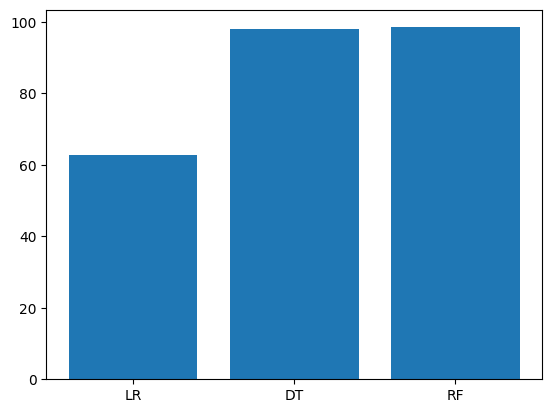

In [13]:
LR = accuracy_score(y_test,regpred)*100
DT = accuracy_score(y_test,dtreepred)*100
RF = accuracy_score(y_test,rfpred)*100

Model = ['LR','DT','RF']
Score = [LR, DT, RF]
barplot = plt.bar(x=Model,height=Score)
plt.show()